## Illustrate the throughput components separately. ##

In [1]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import syseng_throughputs as st

In [2]:
# Check out "master" (from github) into a new directory, so we can compare. 
import shutil
import subprocess

maindir = 'syseng_main'
# Remove previous copy of this directory, if it exists.
try:
    shutil.rmtree(maindir)
except OSError:
    pass
gitcommand = 'git clone https://github.com/lsst-pst/syseng_throughputs.git %s' % maindir
subprocess.run(args=gitcommand.split(), check=True)

Cloning into 'syseng_main'...


CompletedProcess(args=['git', 'clone', 'https://github.com/lsst-pst/syseng_throughputs.git', 'syseng_main'], returncode=0)

### Detector QE curves

In [3]:
# default = 'update'
defaultDirs = st.setDefaultDirs()
# ref = 'previous/main'
refDirs = st.setDefaultDirs(rootDir=maindir)

# Read the individual and combined vendor detectors and plot.
detector_rootdir = defaultDirs['detector'].replace('/joint_minimum', '')
ref_rootdir = refDirs['detector'].replace('/joint_minimum', '')
print('detector options"', os.listdir(detector_rootdir))

detector options" ['joint_minimum', 'e2v', 'itl']


In [4]:
det = {}
det['e2v'] = st.buildVendorDetector(os.path.join(detector_rootdir, 'e2v'), addLosses=True)
det['itl'] = st.buildVendorDetector(os.path.join(detector_rootdir, 'itl'), addLosses=True)
det['det'] = st.buildDetector(defaultDirs['detector'])
refdet = {}
refdet['e2v'] = st.buildVendorDetector(os.path.join(ref_rootdir, 'e2v'), addLosses=True)
refdet['itl'] = st.buildVendorDetector(os.path.join(ref_rootdir, 'itl'), addLosses=True)
refdet['det'] = st.buildDetector(refDirs['detector'])

Text(0.5, 0, 'Wavelength (nm)')

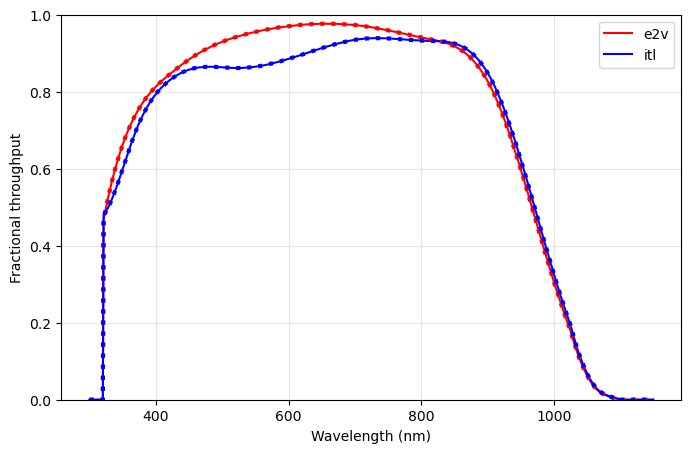

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(det['e2v'].wavelen, det['e2v'].sb, 'r-', label='e2v')
plt.plot(det['itl'].wavelen, det['itl'].sb, 'b-', label='itl')
#plt.plot(det['det'].wavelen, det['det'].sb, 'k:', linewidth=3)
plt.plot(det['e2v'].wavelen, refdet['e2v'].sb, 'r:', linewidth=3)
plt.plot(det['itl'].wavelen, refdet['itl'].sb, 'b:', linewidth=3)
#plt.plot(det['det'].wavelen, refdet['det'].sb, 'k:', linewidth=3)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Lenses

In [6]:
lens = {}
for l in ('lens1', 'lens2', 'lens3'):
    lens[l] = st.buildLens(defaultDirs[l], addLosses=True)
    
reflens = {}
for l in ('lens1', 'lens2', 'lens3'):
    reflens[l] = st.buildLens(refDirs[l], addLosses=True)

Text(0.5, 0, 'Wavelength (nm)')

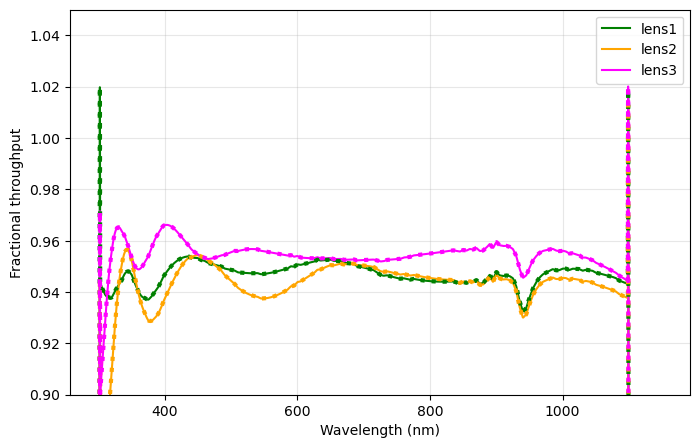

In [7]:
colors= {}
colors['lens1'] = 'green'
colors['lens2'] = 'orange'
colors['lens3'] = 'magenta'
plt.figure(figsize=(8, 5))
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(lens[l].wavelen, lens[l].sb, color=colors[l],
            label=l)
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(reflens[l].wavelen, reflens[l].sb, 
             linestyle=':', color=colors[l], linewidth=3)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylim(0.9, 1.05)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Filters

In [8]:
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
filters = st.buildFilters(defaultDirs['filters'])
reffilters = st.buildFilters(refDirs['filters'])

Text(0.5, 0, 'Wavelength (nm)')

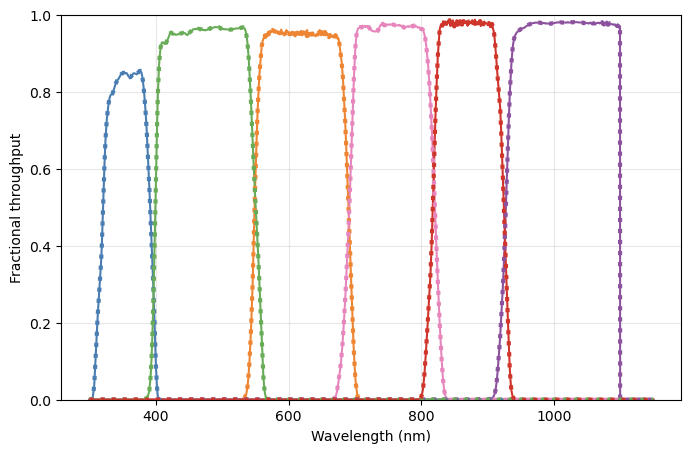

In [9]:
filter_rgb_map = {
    "u": (74 / 256, 125 / 256, 179 / 256),
    "g": (104 / 256, 173 / 256, 87 / 256),
    "r": (238 / 256, 134 / 256, 50 / 256),
    "i": (232 / 256, 135 / 256, 189 / 256),
    "z": (209 / 256, 53 / 256, 43 / 256),
    "y": (142 / 256, 82 / 256, 159 / 256),
}
plt.figure(figsize=(8, 5))
for f in filters:
    plt.plot(filters[f].wavelen, filters[f].sb, color=filter_rgb_map[f])
for f in filters:
    plt.plot(reffilters[f].wavelen, reffilters[f].sb, color=filter_rgb_map[f],
            linestyle=':', linewidth=3)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Mirrors

In [10]:
mirrors = {}
for l in ('mirror1', 'mirror2', 'mirror3'):
    mirrors[l] = st.buildMirror(defaultDirs[l], addLosses=True)
refmirrors = {}
for l in ('mirror1', 'mirror2', 'mirror3'):
    refmirrors[l] = st.buildMirror(refDirs[l], addLosses=True)

Text(0.5, 0, 'Wavelength (nm)')

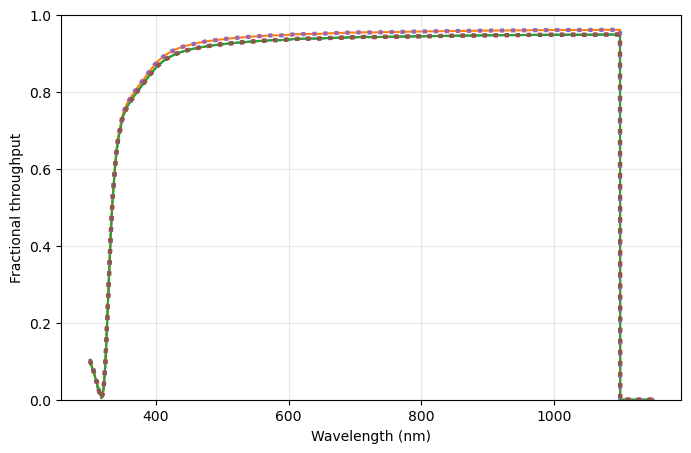

In [11]:
plt.figure(figsize=(8, 5))
for l in ('mirror1', 'mirror2', 'mirror3'):
    plt.plot(mirrors[l].wavelen, mirrors[l].sb)
for l in ('mirror1', 'mirror2', 'mirror3'):
    plt.plot(refmirrors[l].wavelen, refmirrors[l].sb, linewidth=3, linestyle=':')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Combined

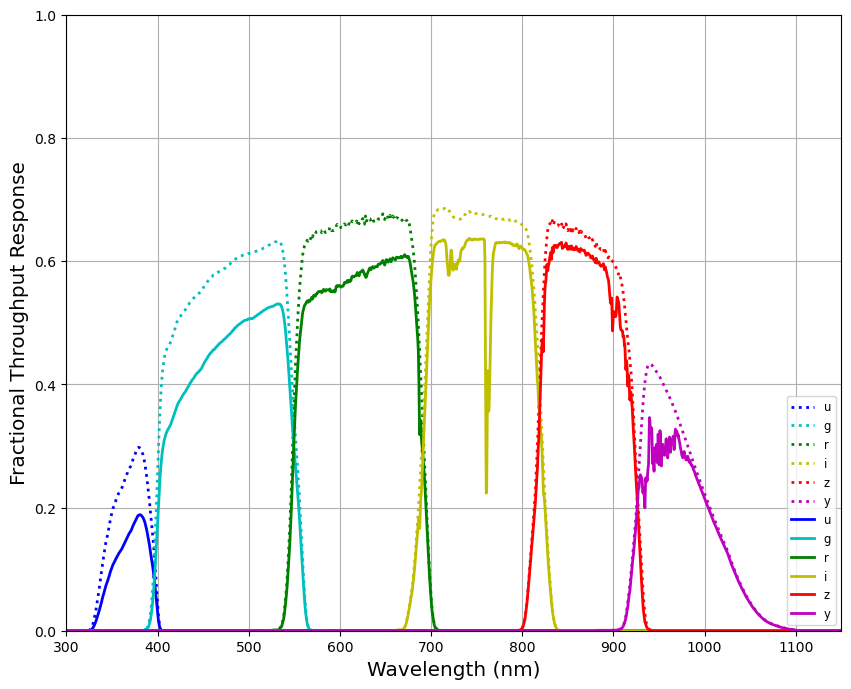

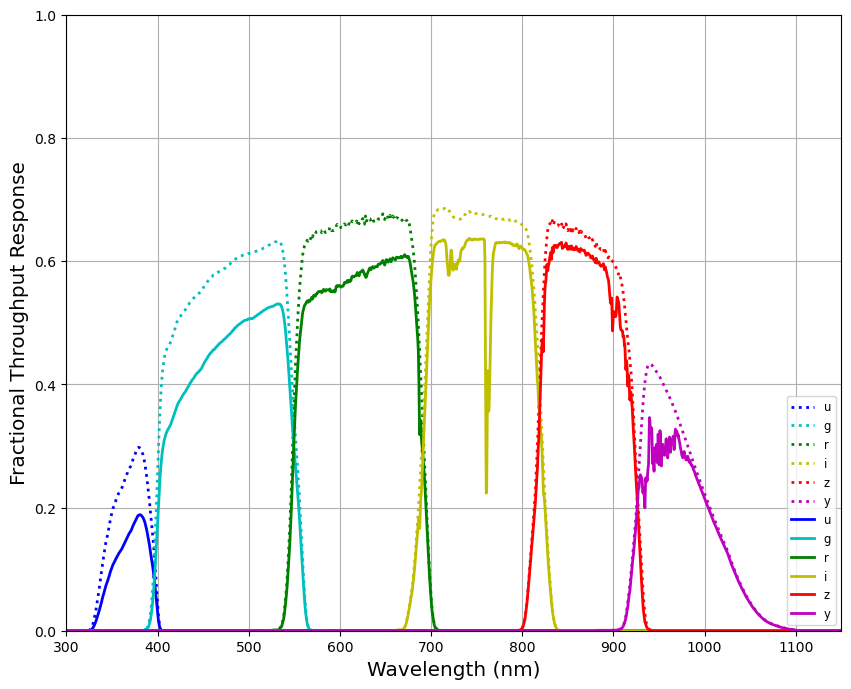

In [12]:
defaultDirs['detector'] = '/'.join(defaultDirs['detector'].split('/')[:-1] + ['e2v'])
refDirs['detector'] = '/'.join(refDirs['detector'].split('/')[:-1] + ['e2v'])
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)
refhardware, refsystem = st.buildHardwareAndSystem(refDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)

plt.figure(figsize=(10, 8))
st.plotBandpasses(hardware, newfig=False, linestyle=':', addlegend=False)
st.plotBandpasses(system, newfig=False, linestyle='-')

plt.figure(figsize=(10, 8))
st.plotBandpasses(refhardware, newfig=False, linestyle=':', addlegend=False)
st.plotBandpasses(refsystem, newfig=False, linestyle='-')

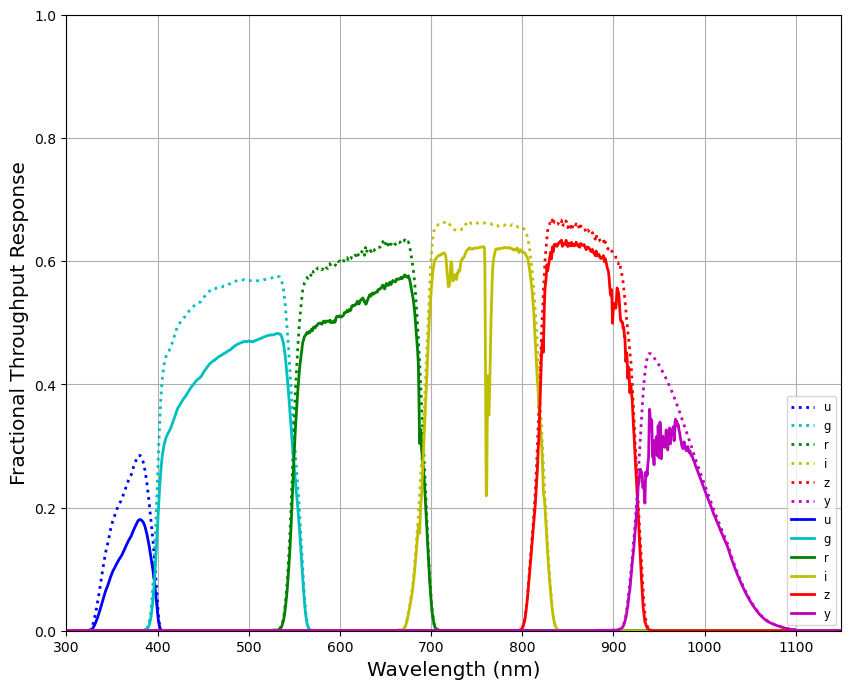

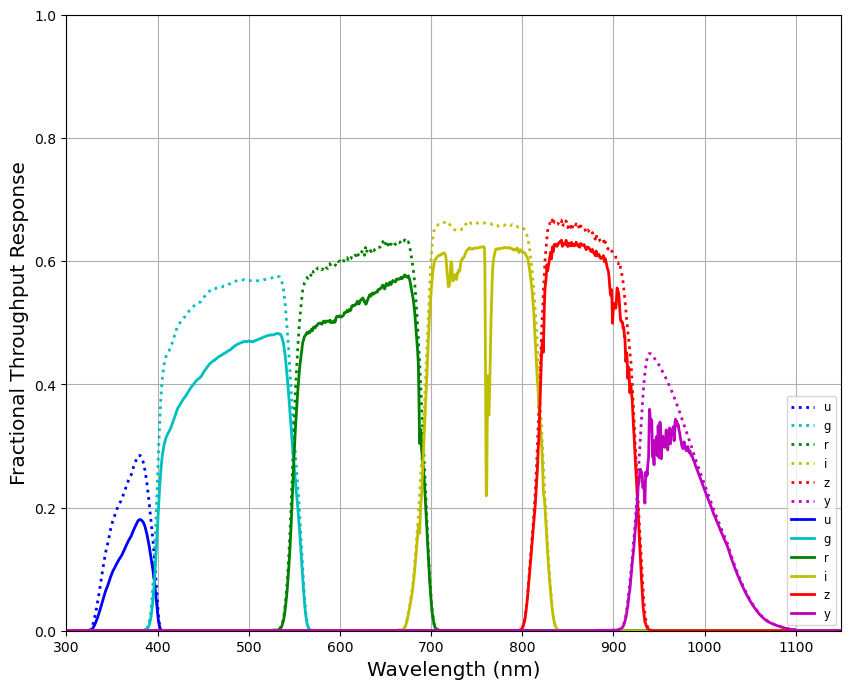

In [13]:
defaultDirs['detector'] = '/'.join(defaultDirs['detector'].split('/')[:-1] + ['itl'])
refDirs['detector'] = '/'.join(refDirs['detector'].split('/')[:-1] + ['itl'])
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)
refhardware, refsystem = st.buildHardwareAndSystem(refDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)

plt.figure(figsize=(10, 8))
st.plotBandpasses(hardware, newfig=False, linestyle=':', addlegend=False)
st.plotBandpasses(system, newfig=False, linestyle='-')

plt.figure(figsize=(10, 8))
st.plotBandpasses(refhardware, newfig=False, linestyle=':', addlegend=False)
st.plotBandpasses(refsystem, newfig=False, linestyle='-')

### Components and total, all together.

Text(0.5, 1.0, 'Reference/old')

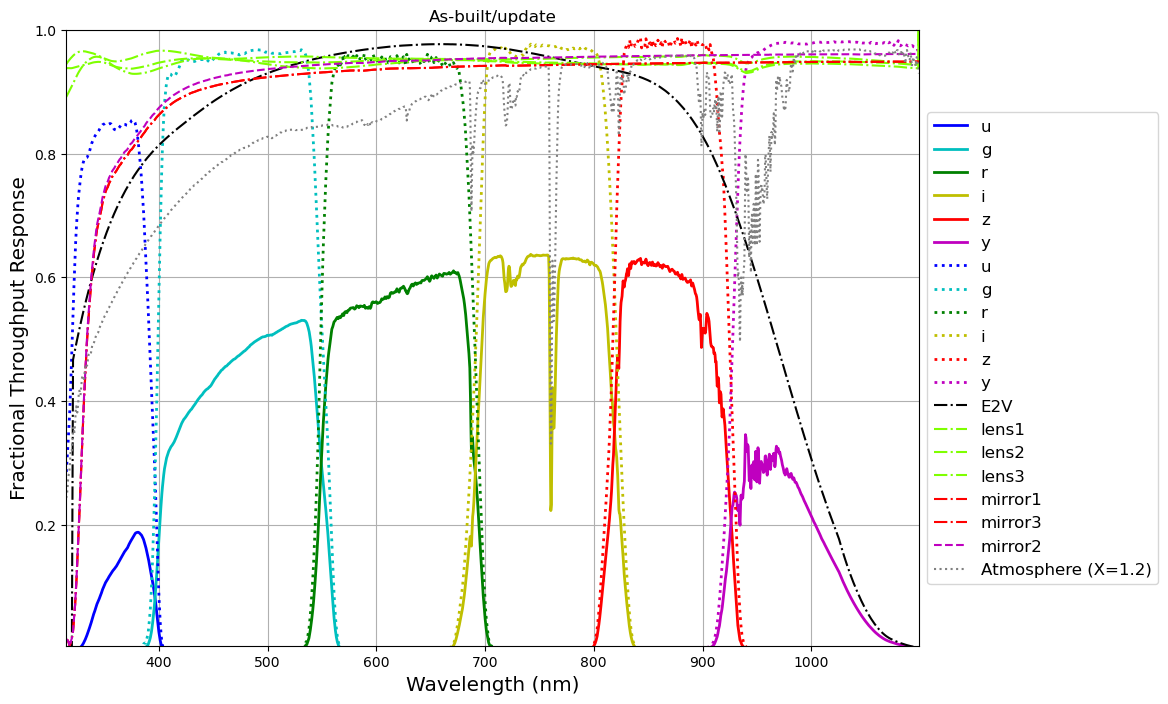

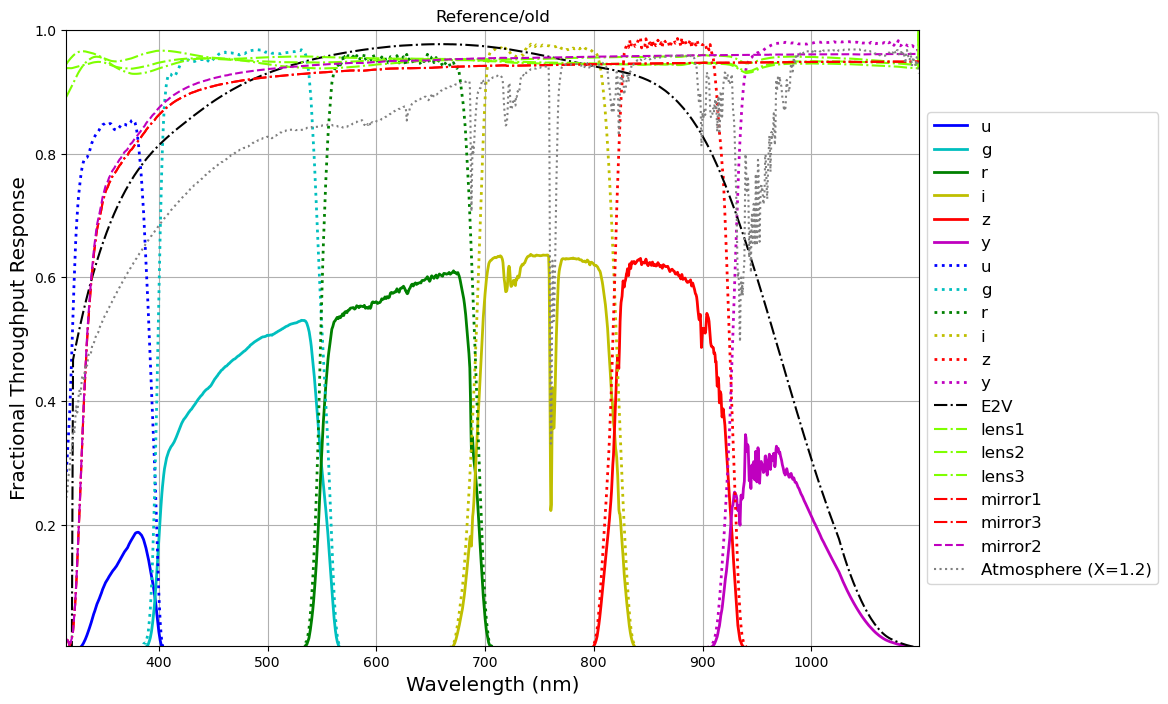

In [14]:
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'])
defaultDirs['detector'] = '/'.join(defaultDirs['detector'].split('/')[:-1] + ['e2v'])
refDirs['detector'] = '/'.join(refDirs['detector'].split('/')[:-1] + ['e2v'])
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)
refhardware, refsystem = st.buildHardwareAndSystem(refDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)

plt.figure(figsize=(11, 8))
st.plotBandpasses(system, newfig=False, linestyle='-', addlegend=False)
st.plotBandpasses(filters, newfig=False, linestyle=':', addlegend=False)
plt.plot(det['e2v'].wavelen, det['e2v'].sb, 'k', linestyle='-.', label='E2V')
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(lens[l].wavelen, lens[l].sb, color='chartreuse', linestyle='-.', label=l)
for l in (['mirror1', 'mirror3']):
    plt.plot(mirrors[l].wavelen, mirrors[l].sb, 'r-.', label=l)
for l in (['mirror2']):
    plt.plot(mirrors[l].wavelen, mirrors[l].sb, 'm--', label=l)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'gray', linestyle=':', label='Atmosphere (X=1.2)')
plt.legend(loc=(1.01, 0.1), fontsize='large', fancybox=True)
plt.xlim(315, 1099)
plt.ylim(0.005, 1.0)
plt.title('As-built/update')

plt.figure(figsize=(11, 8))
st.plotBandpasses(refsystem, newfig=False, linestyle='-', addlegend=False)
st.plotBandpasses(reffilters, newfig=False, linestyle=':', addlegend=False)
plt.plot(refdet['e2v'].wavelen, refdet['e2v'].sb, 'k', linestyle='-.', label='E2V')
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(reflens[l].wavelen, reflens[l].sb, color='chartreuse', linestyle='-.', label=l)
for l in (['mirror1', 'mirror3']):
    plt.plot(refmirrors[l].wavelen, refmirrors[l].sb, 'r-.', label=l)
for l in (['mirror2']):
    plt.plot(refmirrors[l].wavelen, refmirrors[l].sb, 'm--', label=l)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'gray', linestyle=':', label='Atmosphere (X=1.2)')
plt.legend(loc=(1.01, 0.1), fontsize='large', fancybox=True)
plt.xlim(315, 1099)
plt.ylim(0.005, 1.0)
plt.title('Reference/old')

{'detector': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/detector/itl', 'lens1': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/lens1', 'lens2': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/lens2', 'lens3': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/lens3', 'filters': '/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/filters', 'mirror1': '/Users/lynnej/lsst_repos/syseng_throughputs/components/telescope/mirror1', 'mirror2': '/Users/lynnej/lsst_repos/syseng_throughputs/components/telescope/mirror2', 'mirror3': '/Users/lynnej/lsst_repos/syseng_throughputs/components/telescope/mirror3', 'atmosphere': '/Users/lynnej/lsst_repos/syseng_throughputs/siteProperties'}


Text(0.5, 1.0, 'Reference/old')

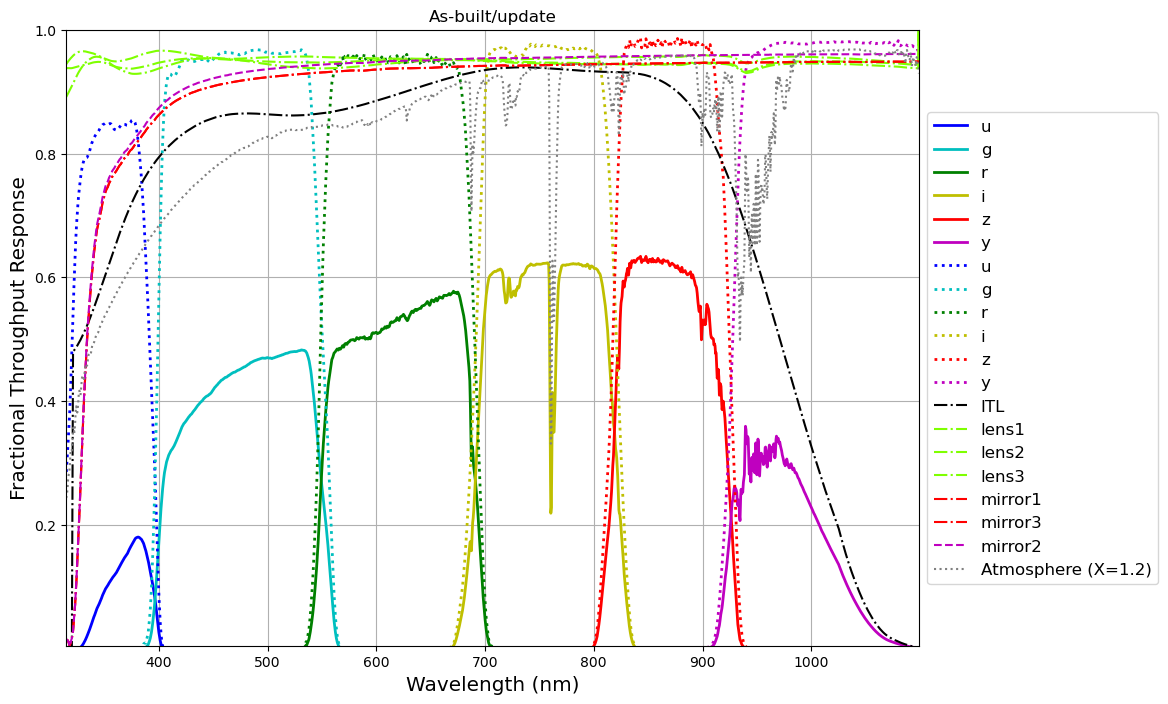

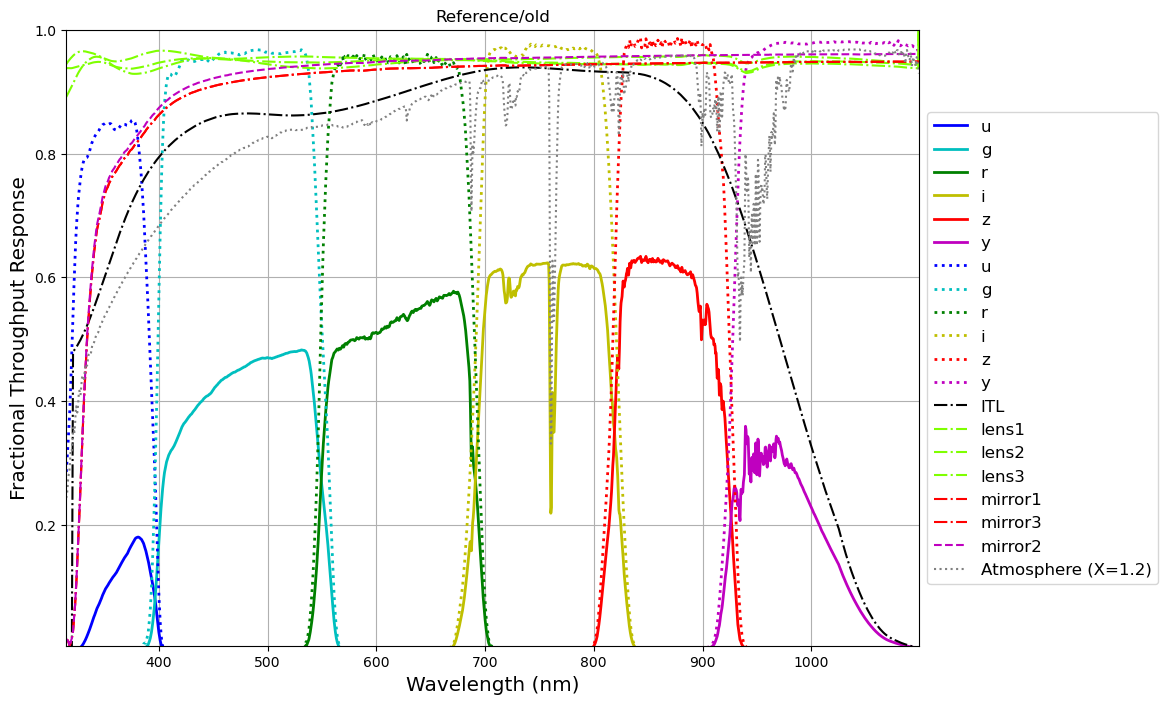

In [15]:
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'])
defaultDirs['detector'] = '/'.join(defaultDirs['detector'].split('/')[:-1] + ['itl'])
refDirs['detector'] = '/'.join(refDirs['detector'].split('/')[:-1] + ['itl'])
print(defaultDirs)
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)
refhardware, refsystem = st.buildHardwareAndSystem(refDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)


plt.figure(figsize=(11, 8))
st.plotBandpasses(system, newfig=False, linestyle='-', addlegend=False)
st.plotBandpasses(filters, newfig=False, linestyle=':', addlegend=False)
plt.plot(det['itl'].wavelen, det['itl'].sb, 'k', linestyle='-.', label='ITL')
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(lens[l].wavelen, lens[l].sb, color='chartreuse', linestyle='-.', label=l)
for l in (['mirror1', 'mirror3']):
    plt.plot(mirrors[l].wavelen, mirrors[l].sb, 'r-.', label=l)
for l in (['mirror2']):
    plt.plot(mirrors[l].wavelen, mirrors[l].sb, 'm--', label=l)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'gray', linestyle=':', label='Atmosphere (X=1.2)')
plt.legend(loc=(1.01, 0.1), fontsize='large', fancybox=True)
plt.xlim(315, 1099)
plt.ylim(0.005, 1.0)
plt.title('As-built/update')

plt.figure(figsize=(11, 8))
st.plotBandpasses(refsystem, newfig=False, linestyle='-', addlegend=False)
st.plotBandpasses(reffilters, newfig=False, linestyle=':', addlegend=False)
plt.plot(refdet['itl'].wavelen, refdet['itl'].sb, 'k', linestyle='-.', label='ITL')
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(reflens[l].wavelen, reflens[l].sb, color='chartreuse', linestyle='-.', label=l)
for l in (['mirror1', 'mirror3']):
    plt.plot(refmirrors[l].wavelen, refmirrors[l].sb, 'r-.', label=l)
for l in (['mirror2']):
    plt.plot(refmirrors[l].wavelen, refmirrors[l].sb, 'm--', label=l)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'gray', linestyle=':', label='Atmosphere (X=1.2)')
plt.legend(loc=(1.01, 0.1), fontsize='large', fancybox=True)
plt.xlim(315, 1099)
plt.ylim(0.005, 1.0)
plt.title('Reference/old')

In [16]:
# Compare m5 values before/after the update (SRD version)

# E2V 


defaultDirs['detector'] = '/'.join(defaultDirs['detector'].split('/')[:-1] + ['e2v'])
refDirs['detector'] = '/'.join(refDirs['detector'].split('/')[:-1] + ['e2v'])

srd = False

if srd:
    print('srd version')
    atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')
    update_hardware, update_system = st.buildHardwareAndSystem(defaultDirs, addLosses=False, 
                                                 atmosphereOverride=atmosphere)
    ref_hardware, ref_system = st.buildHardwareAndSystem(refDirs, addLosses=False, 
                                                 atmosphereOverride=atmosphere)

    update_m5 = st.makeM5(update_hardware, update_system, darksky=None, 
                          exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                          X=1.0, fwhm500=0.62)
    ref_m5 = st.makeM5(ref_hardware, ref_system, darksky=None, 
                       exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                           X=1.0, fwhm500=0.62)

# Non-SRD version
if not srd:
    print('non-srd version')
    atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')
    update_hardware, update_system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                                 atmosphereOverride=atmosphere)
    ref_hardware, ref_system = st.buildHardwareAndSystem(refDirs, addLosses=True, 
                                                 atmosphereOverride=atmosphere)

    update_m5 = st.makeM5(update_hardware, update_system, darksky=None, 
                          #exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                          X=1.2, fwhm500=0.72)
    ref_m5 = st.makeM5(ref_hardware, ref_system, darksky=None, 
                       #exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                           X=1.2, fwhm500=0.72)

system_e2v = copy.deepcopy(update_system)
e2v = update_m5.copy()

print(defaultDirs['detector'], refDirs['detector'])

non-srd version
/Users/lynnej/lsst_repos/syseng_throughputs/components/camera/detector/e2v syseng_main/components/camera/detector/e2v


In [17]:
update_m5

,nexp,exptime,FWHMeff,FWHMgeom,skyMag,skyCounts,Zp_t,Tb,Sb,kAtm,gamma,Cm,dCm_infinity,dCm_double,m5,sourceCounts,m5_fid,m5_min
u,1.0,30.0,1.159165,1.004834,23.053452,48.237773,26.498356,0.022388,0.037692,0.471343,0.038052,23.030532,0.527484,0.334157,23.415371,513.233694,23.9,23.4
g,2.0,15.0,1.091139,0.948916,22.246542,492.818747,28.526856,0.145013,0.183141,0.211209,0.039059,24.554811,0.151402,0.079761,24.653885,1062.452406,25.0,24.6
r,2.0,15.0,1.028602,0.897511,21.199561,1069.271444,28.422739,0.131753,0.151494,0.126325,0.039270,24.616912,0.075363,0.037371,24.273554,1370.234844,24.7,24.3
i,2.0,15.0,0.985239,0.861867,20.467197,1617.811801,28.180111,0.105368,0.116759,0.092877,0.039366,24.534916,0.051045,0.024476,23.878830,1576.280820,24.0,23.6
z,2.0,15.0,0.956353,0.838122,19.606479,2382.443679,27.770506,0.072255,0.077821,0.067147,0.039453,24.357600,0.035225,0.016331,23.308609,1827.595005,23.3,22.9
y,2.0,15.0,0.933155,0.819054,18.601590,2717.126535,26.795496,0.029435,0.035175,0.161180,0.039473,23.837001,0.031017,0.014170,22.293421,1896.493199,22.1,21.7


In [18]:
cols=['nexp', 'exptime',  'm5_fid', 'm5_min', 'm5']
delta = pd.DataFrame((update_m5.m5 - ref_m5.m5).values, index=update_m5.index, columns=['Delta m5'])
t = ref_m5[cols].join(update_m5['m5'], rsuffix=' built').join(delta)[cols + ['m5 built', 'Delta m5']]
t.round(2)

,nexp,exptime,m5_fid,m5_min,m5,m5 built,Delta m5
u,1.0,30.0,23.9,23.4,23.42,23.42,0.0
g,2.0,15.0,25.0,24.6,24.65,24.65,0.0
r,2.0,15.0,24.7,24.3,24.27,24.27,0.0
i,2.0,15.0,24.0,23.6,23.88,23.88,0.0
z,2.0,15.0,23.3,22.9,23.31,23.31,0.0
y,2.0,15.0,22.1,21.7,22.29,22.29,0.0


In [19]:
# ITL 

atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')

defaultDirs['detector'] = '/'.join(defaultDirs['detector'].split('/')[:-1] + ['itl'])
refDirs['detector'] = '/'.join(refDirs['detector'].split('/')[:-1] + ['itl'])


if srd:
    print('srd version')
    update_hardware, update_system = st.buildHardwareAndSystem(defaultDirs, addLosses=False, 
                                                 atmosphereOverride=atmosphere)
    ref_hardware, ref_system = st.buildHardwareAndSystem(refDirs, addLosses=False, 
                                                 atmosphereOverride=atmosphere)
    
    update_m5 = st.makeM5(update_hardware, update_system, darksky=None, 
                          exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                          X=1.0, fwhm500=0.62)
    ref_m5 = st.makeM5(ref_hardware, ref_system, darksky=None, 
                       exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                           X=1.0, fwhm500=0.62)

# Non-SRD version
if not srd:
    print('non-srd version')
    atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')
    update_hardware, update_system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                                 atmosphereOverride=atmosphere)
    ref_hardware, ref_system = st.buildHardwareAndSystem(refDirs, addLosses=True, 
                                                 atmosphereOverride=atmosphere)

    update_m5 = st.makeM5(update_hardware, update_system, darksky=None, 
                          #exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                          X=1.2, fwhm500=0.72)
    ref_m5 = st.makeM5(ref_hardware, ref_system, darksky=None, 
                       #exptime=15, nexp=2,
                         readnoise=8.8, othernoise=0, darkcurrent=0.2,
                           X=1.2, fwhm500=0.72)
system_itl = copy.deepcopy(update_system)
itl = update_m5.copy()

non-srd version


In [20]:
cols=['nexp', 'exptime',  'm5_fid', 'm5_min', 'm5']
delta = pd.DataFrame((update_m5.m5 - ref_m5.m5).values, index=update_m5.index, columns=['Delta m5'])
tt = ref_m5[cols].join(update_m5['m5'], rsuffix=' built').join(delta)[cols + ['m5 built', 'Delta m5']]
tt.round(2)

,nexp,exptime,m5_fid,m5_min,m5,m5 built,Delta m5
u,1.0,30.0,23.9,23.4,23.36,23.36,0.0
g,2.0,15.0,25.0,24.6,24.62,24.62,0.0
r,2.0,15.0,24.7,24.3,24.22,24.22,0.0
i,2.0,15.0,24.0,23.6,23.86,23.86,0.0
z,2.0,15.0,23.3,22.9,23.32,23.32,0.0
y,2.0,15.0,22.1,21.7,22.32,22.32,0.0


In [21]:
jj = t.join(tt[['m5 built', 'Delta m5']], lsuffix=' E2V', rsuffix=' ITL')[['nexp', 'exptime', 
                                                                      'm5_min', 'm5_fid', 'm5 built E2V', 'm5 built ITL',
                                                                     'Delta m5 ITL']]
jj['Change (as-built)'] = jj['Delta m5 ITL']
jj[['nexp', 'exptime', 'm5_min', 'm5_fid', 'm5 built E2V', 'm5 built ITL']].round(2)

,nexp,exptime,m5_min,m5_fid,m5 built E2V,m5 built ITL
u,1.0,30.0,23.4,23.9,23.42,23.36
g,2.0,15.0,24.6,25.0,24.65,24.62
r,2.0,15.0,24.3,24.7,24.27,24.22
i,2.0,15.0,23.6,24.0,23.88,23.86
z,2.0,15.0,22.9,23.3,23.31,23.32
y,2.0,15.0,21.7,22.1,22.29,22.32


In [22]:
dd = e2v.join(itl, lsuffix=' e2v', rsuffix=' itl')[['Tb e2v', 'Tb itl', 'Sb e2v', 'Sb itl', 'm5 e2v', 'm5 itl']]
dd.round(3)

,Tb e2v,Tb itl,Sb e2v,Sb itl,m5 e2v,m5 itl
u,0.022,0.021,0.038,0.035,23.415,23.360
g,0.145,0.137,0.183,0.173,24.654,24.618
r,0.132,0.122,0.151,0.140,24.274,24.223
i,0.105,0.103,0.117,0.114,23.879,23.864
z,0.072,0.073,0.078,0.079,23.309,23.315
y,0.029,0.031,0.035,0.037,22.293,22.323


In [23]:
dd['Sb e2v'] / dd['Sb itl']

u    1.066209
g    1.055825
r    1.083549
i    1.022723
z    0.986182
y    0.950122
dtype: float64

/var/folders/tr/bjzqy0h17kx31fhndw6050d80000gn/T/ipykernel_18985/3784819516.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(system_e2v[f].wavelen[good], system_e2v[f].sb[good] / system_itl[f].sb[good])


(0.9, 1.15)

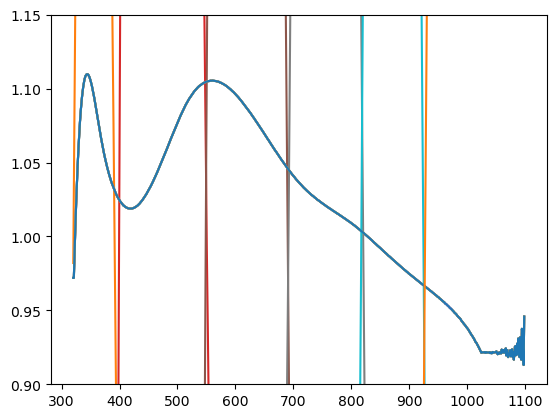

In [24]:
good = np.where(det['itl'].sb > 0)
for f in 'ugrizy':
    plt.plot(system_e2v[f].wavelen[good], system_e2v[f].sb[good] / system_itl[f].sb[good])
    plt.plot(filters[f].wavelen[good], filters[f].sb[good] + 0.5)
plt.ylim(0.9, 1.15)